In [5]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd

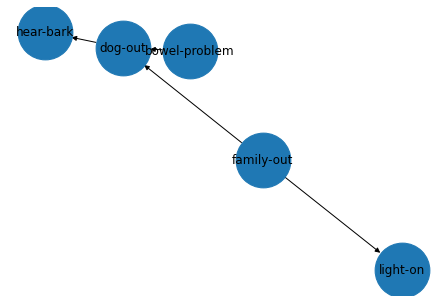

In [6]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()

ALL NODES: ['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']
HERE ARE THE LEAF NODES: ['light-on', 'hear-bark']
NODES FOR DELETING: ['hear-bark']


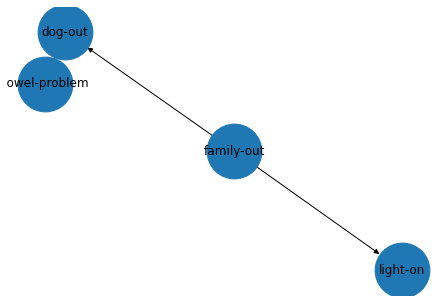

In [7]:
reasoner = BNReasoner(dog_network)
# D-Seperation
# Given three sets of variables X, Y , and Z, determine whether X is independent of Y given Z

x = 'bowel-problem'
y = 'hear-bark'
z = ['dog-out']

Query = ["light-on"]
evidence = [("family-out"), ("dog-out")]
reasoner.node_pruning(Query, evidence)



In [8]:


# #leaf_nodes = [x for x in X if len(dog_network.get_children(x)) == 0]
# print(X)
